In [57]:
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
from datetime import datetime
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf

In [2]:
df=pd.read_csv(r'C:\Users\asifk\Desktop\New folder\clean_data.csv',parse_dates=['Checkout_Date'],index_col='Checkout_Date')

In [3]:
df.head()

,Order_Nbr,WSLR_Nbr,Carton_Factor,Lead_Date_in_Weeks,Cost,Item_Active,On_Hand_Inventory,Pending_WO_Inventory,Remaining_Inventory_Weeks,Order_Quantity,Item_Nbr,Item_Description,City,State,Supplier,LastModId
Checkout_Date,,,,,,,,,,,,,,,,
2018-12-04,0,0,0,12.0,12.0,1,112,0,22.0,1,35,369,795,25,1,0
2018-12-04,1,0,0,10.0,28.0,0,0,0,52.0,1,17,18,616,35,1,0
2018-12-05,18,204,0,8.0,110.0,1,1217,3000,62.0,5,6,327,642,18,1,0
2018-12-06,29,0,0,16.0,18.0,1,459,0,38.0,2,8,400,795,25,1,0
2018-12-06,32,264,1,6.0,11.5,0,0,0,52.0,6,39,862,480,9,1,0


In [4]:
df.corr()

,Order_Nbr,WSLR_Nbr,Carton_Factor,Lead_Date_in_Weeks,Cost,Item_Active,On_Hand_Inventory,Pending_WO_Inventory,Remaining_Inventory_Weeks,Order_Quantity,Item_Nbr,Item_Description,City,State,Supplier,LastModId
Order_Nbr,1.000000,-0.041391,0.053275,-0.087370,-0.118935,0.118083,-0.054542,-1.329017e-02,-0.048846,0.021139,0.478544,-0.506072,0.006895,-0.002668,5.775103e-04,6.095953e-01
WSLR_Nbr,-0.041391,1.000000,0.072686,0.152635,0.065185,-0.035453,0.072001,5.671842e-02,0.024123,0.056033,-0.170961,-0.004896,-0.034169,0.164236,1.892384e-03,1.153201e-02
Carton_Factor,0.053275,0.072686,1.000000,-0.002203,-0.144182,0.032257,0.106133,3.288465e-02,0.021021,-0.076714,0.045431,-0.082123,0.001282,0.018649,-2.610337e-02,-2.167113e-02
Lead_Date_in_Weeks,-0.087370,0.152635,-0.002203,1.000000,0.175079,-0.094565,0.366053,3.751943e-01,0.038896,0.032387,-0.479674,-0.026742,0.002772,0.024337,-1.344482e-02,-2.203665e-03
Cost,-0.118935,0.065185,-0.144182,0.175079,1.000000,-0.065636,-0.020921,-3.485463e-02,0.010778,-0.114073,-0.268706,0.020312,0.003845,-0.001575,1.620579e-02,6.757057e-03
Item_Active,0.118083,-0.035453,0.032257,-0.094565,-0.065636,1.000000,0.054624,4.579099e-02,0.029344,-0.092589,0.241195,-0.117554,0.008182,-0.009116,-3.587398e-03,8.290734e-02
On_Hand_Inventory,-0.054542,0.072001,0.106133,0.366053,-0.020921,0.054624,1.000000,7.433639e-01,0.377414,0.051821,-0.356096,0.046754,-0.002625,0.004901,5.583921e-04,-4.662132e-02
Pending_WO_Inventory,-0.013290,0.056718,0.032885,0.375194,-0.034855,0.045791,0.743364,1.000000e+00,-0.016718,0.070075,-0.324471,-0.044818,-0.007129,0.000631,-3.312194e-19,-3.728568e-02
Remaining_Inventory_Weeks,-0.048846,0.024123,0.021021,0.038896,0.010778,0.029344,0.377414,-1.671771e-02,1.000000,-0.027373,-0.137535,0.105635,-0.003132,0.000685,2.561143e-03,-4.738675e-03
Order_Quantity,0.021139,0.056033,-0.076714,0.032387,-0.114073,-0.092589,0.051821,7.007513e-02,-0.027373,1.000000,0.003757,0.027712,-0.004085,-0.029084,-1.224869e-03,1.448387e-03


In [5]:
df.index

DatetimeIndex(['2018-12-04', '2018-12-04', '2018-12-05', '2018-12-06',
               '2018-12-06', '2018-12-06', '2018-12-07', '2018-12-07',
               '2018-12-07', '2018-12-07',
               ...
               '2020-05-14', '2020-05-14', '2020-05-14', '2020-05-14',
               '2020-05-15', '2020-05-15', '2020-05-15', '2020-05-15',
               '2020-05-15', '2020-05-15'],
              dtype='datetime64[ns]', name='Checkout_Date', length=48149, freq=None)

In [6]:
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

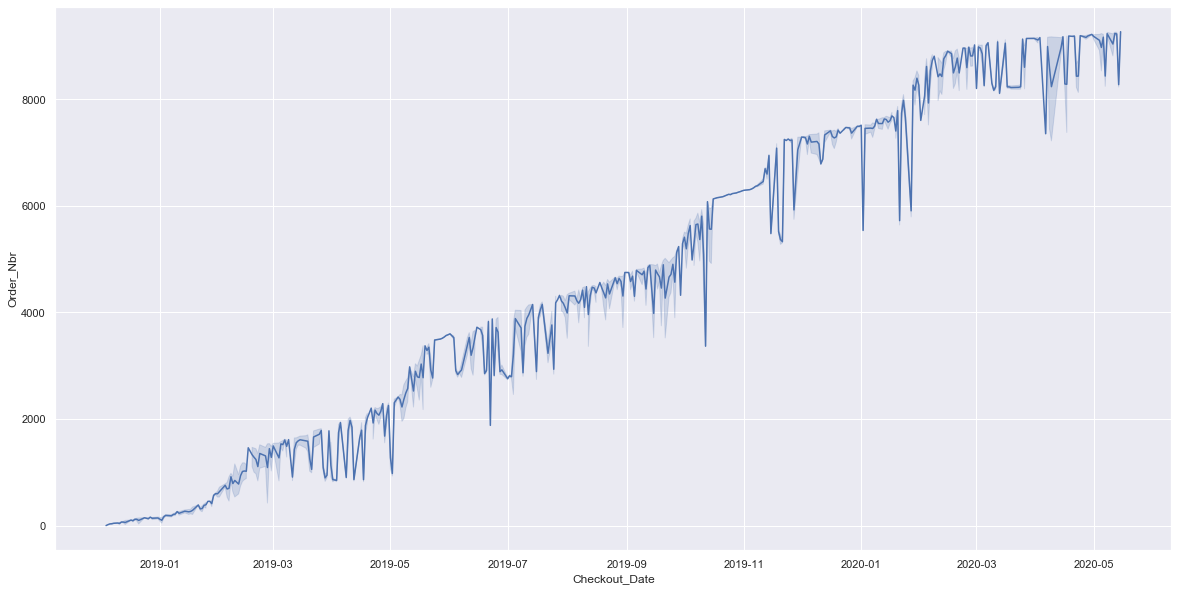

In [7]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x=df.index,y='Order_Nbr',data=df)

Kurtosis of normal distribution: -1.2975899853598
Skewness of normal distribution: -0.15154688830608187


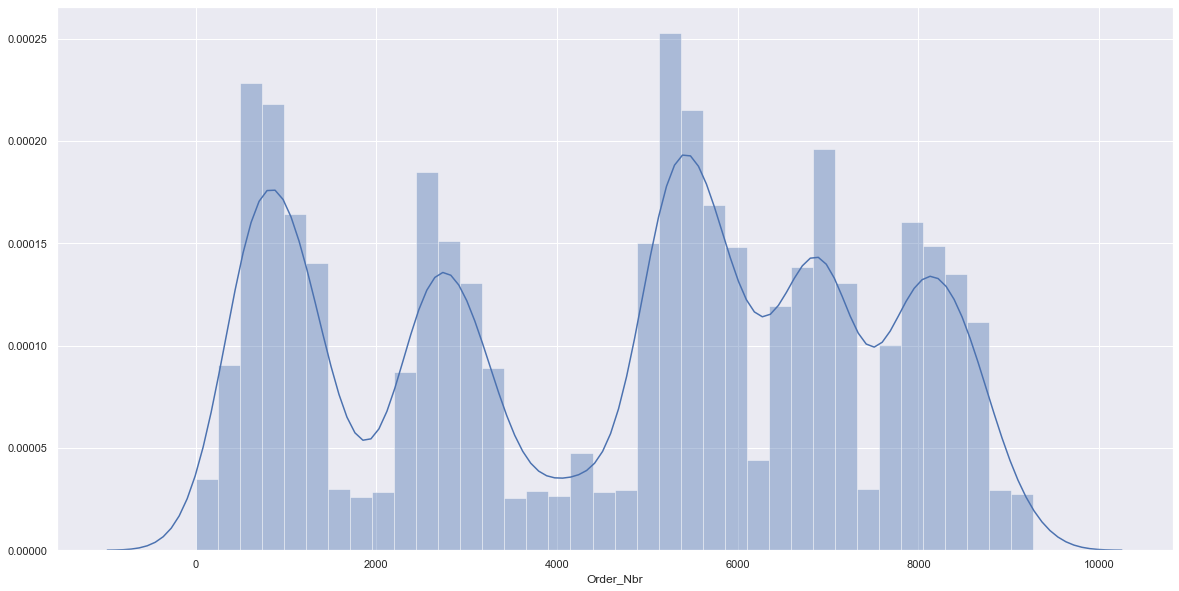

In [59]:
sns.set(rc={'figure.figsize':(20,10)})

sns.distplot(df.Order_Nbr);


print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.Order_Nbr)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df.Order_Nbr)))

KURTOSIS: describes heaviness of the tails of a distribution

Normal Distribution has a kurtosis of close to 0. If the kurtosis is greater than zero, then distribution has heavier tails. If the kurtosis is less than zero, then the distribution is light tails. And our Kurtosis is less than zero.

SKEWNESS:

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed. And our skewness is lesser than 1.

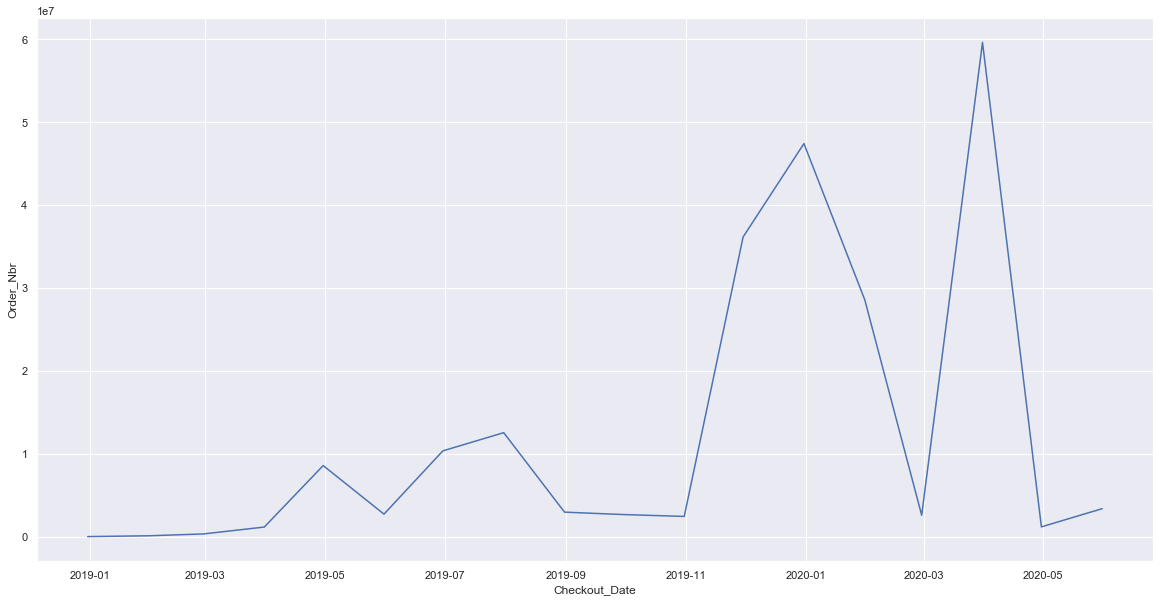

In [8]:
df_by_month=df.resample('M').sum()
sns.lineplot(x=df_by_month.index,y='Order_Nbr',data=df_by_month)

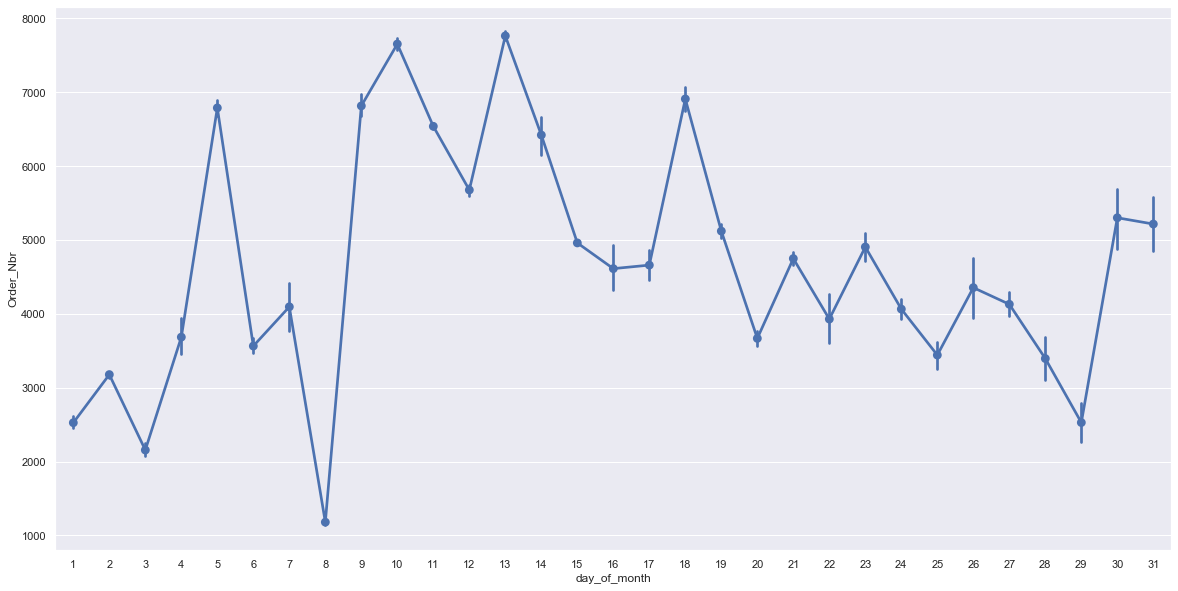

In [9]:
sns.pointplot(data=df,x='day_of_month',y='Order_Nbr')

In [10]:
df.head()

,Order_Nbr,WSLR_Nbr,Carton_Factor,Lead_Date_in_Weeks,Cost,Item_Active,On_Hand_Inventory,Pending_WO_Inventory,Remaining_Inventory_Weeks,Order_Quantity,Item_Nbr,Item_Description,City,State,Supplier,LastModId,day_of_month,day_of_week,month
Checkout_Date,,,,,,,,,,,,,,,,,,,
2018-12-04,0,0,0,12.0,12.0,1,112,0,22.0,1,35,369,795,25,1,0,4,1,12
2018-12-04,1,0,0,10.0,28.0,0,0,0,52.0,1,17,18,616,35,1,0,4,1,12
2018-12-05,18,204,0,8.0,110.0,1,1217,3000,62.0,5,6,327,642,18,1,0,5,2,12
2018-12-06,29,0,0,16.0,18.0,1,459,0,38.0,2,8,400,795,25,1,0,6,3,12
2018-12-06,32,264,1,6.0,11.5,0,0,0,52.0,6,39,862,480,9,1,0,6,3,12


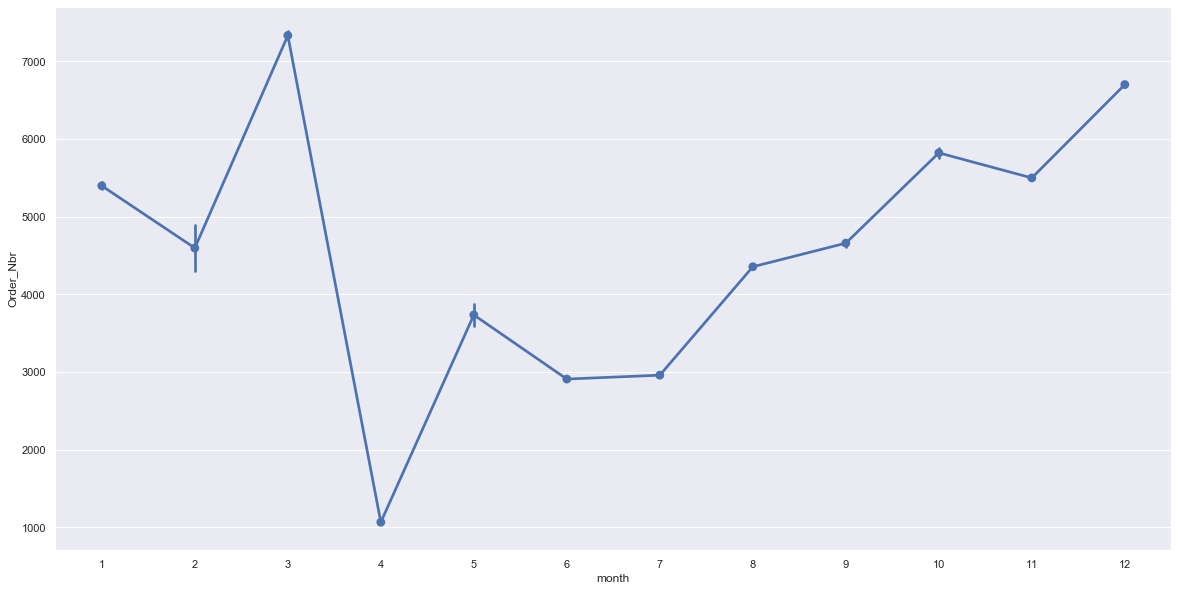

In [11]:
sns.pointplot(data=df,x='month',y='Order_Nbr')

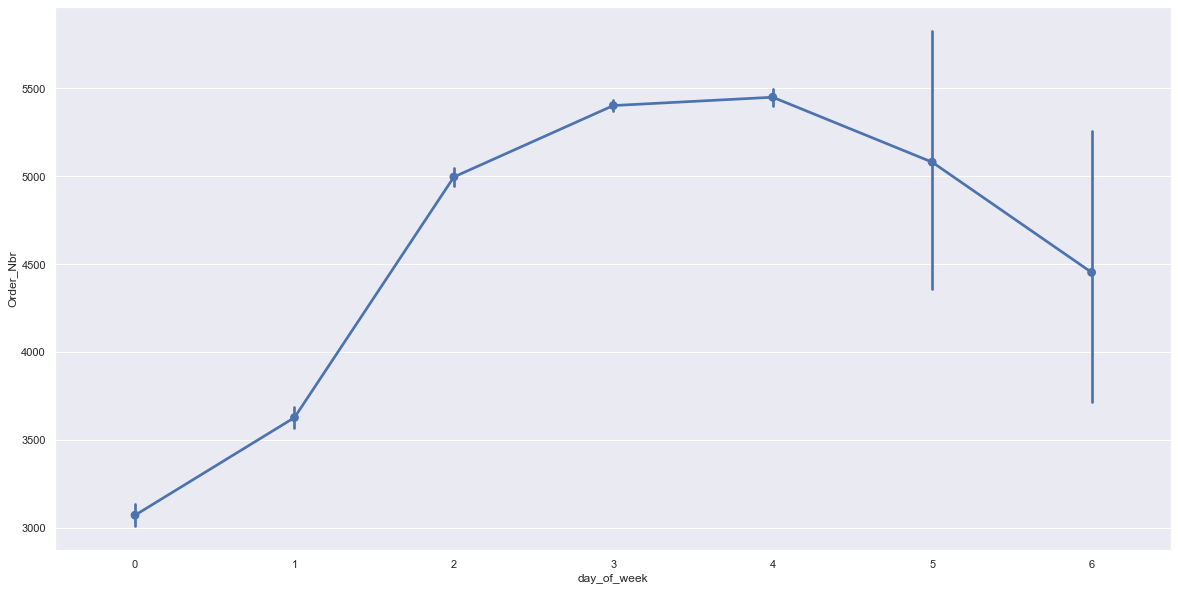

In [12]:
sns.pointplot(data=df,x='day_of_week',y='Order_Nbr')

In [13]:
df

,Order_Nbr,WSLR_Nbr,Carton_Factor,Lead_Date_in_Weeks,Cost,Item_Active,On_Hand_Inventory,Pending_WO_Inventory,Remaining_Inventory_Weeks,Order_Quantity,Item_Nbr,Item_Description,City,State,Supplier,LastModId,day_of_month,day_of_week,month
Checkout_Date,,,,,,,,,,,,,,,,,,,
2018-12-04,0,0,0,12.0,12.0,1,112,0,22.0,1,35,369,795,25,1,0,4,1,12
2018-12-04,1,0,0,10.0,28.0,0,0,0,52.0,1,17,18,616,35,1,0,4,1,12
2018-12-05,18,204,0,8.0,110.0,1,1217,3000,62.0,5,6,327,642,18,1,0,5,2,12
2018-12-06,29,0,0,16.0,18.0,1,459,0,38.0,2,8,400,795,25,1,0,6,3,12
2018-12-06,32,264,1,6.0,11.5,0,0,0,52.0,6,39,862,480,9,1,0,6,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-15,9270,184,0,8.0,170.0,1,208,0,14.0,1,77,340,209,1,1,1,15,4,5
2020-05-15,9271,221,9,16.0,37.5,1,4655,1000,435.0,4,69,508,603,25,1,1,15,4,5
2020-05-15,9272,181,0,16.0,38.0,1,927,1000,12.0,15,175,260,16,50,1,1,15,4,5


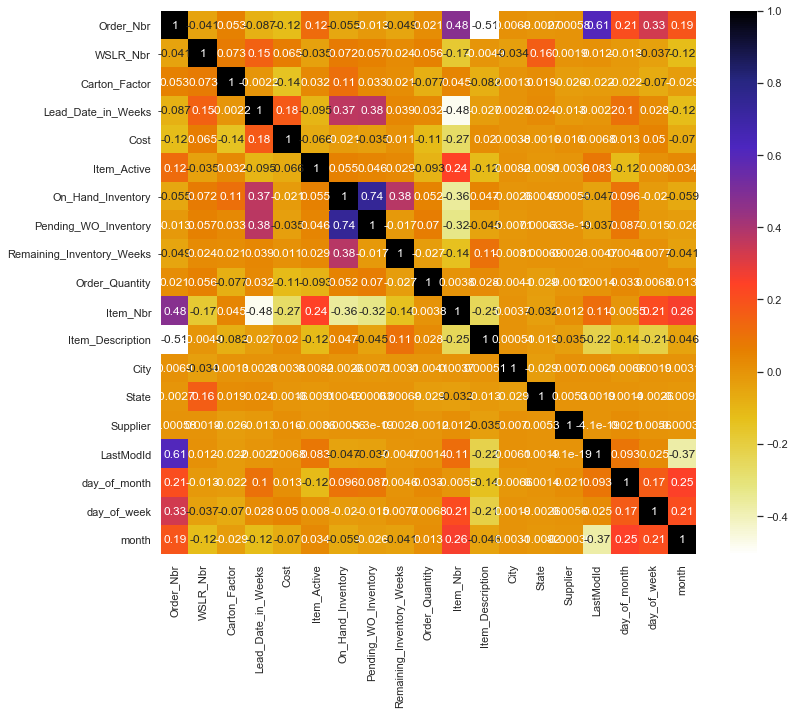

In [14]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [15]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [16]:
corr_features = correlation(df, 0.1)
len(set(corr_features))

14

In [17]:
df.head()

,Order_Nbr,WSLR_Nbr,Carton_Factor,Lead_Date_in_Weeks,Cost,Item_Active,On_Hand_Inventory,Pending_WO_Inventory,Remaining_Inventory_Weeks,Order_Quantity,Item_Nbr,Item_Description,City,State,Supplier,LastModId,day_of_month,day_of_week,month
Checkout_Date,,,,,,,,,,,,,,,,,,,
2018-12-04,0,0,0,12.0,12.0,1,112,0,22.0,1,35,369,795,25,1,0,4,1,12
2018-12-04,1,0,0,10.0,28.0,0,0,0,52.0,1,17,18,616,35,1,0,4,1,12
2018-12-05,18,204,0,8.0,110.0,1,1217,3000,62.0,5,6,327,642,18,1,0,5,2,12
2018-12-06,29,0,0,16.0,18.0,1,459,0,38.0,2,8,400,795,25,1,0,6,3,12
2018-12-06,32,264,1,6.0,11.5,0,0,0,52.0,6,39,862,480,9,1,0,6,3,12


In [18]:
df.drop(['WSLR_Nbr','Lead_Date_in_Weeks','Cost','On_Hand_Inventory','Pending_WO_Inventory','Remaining_Inventory_Weeks','State'],axis='columns', inplace=True)

In [19]:
df.columns

Index(['Order_Nbr', 'Carton_Factor', 'Item_Active', 'Order_Quantity',
       'Item_Nbr', 'Item_Description', 'City', 'Supplier', 'LastModId',
       'day_of_month', 'day_of_week', 'month'],
      dtype='object')

In [20]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(43334, 12) (4815, 12)


In [21]:
df.columns

Index(['Order_Nbr', 'Carton_Factor', 'Item_Active', 'Order_Quantity',
       'Item_Nbr', 'Item_Description', 'City', 'Supplier', 'LastModId',
       'day_of_month', 'day_of_week', 'month'],
      dtype='object')

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
f_columns = [ 'Carton_Factor', 'Item_Active', 'Order_Quantity',
       'Item_Nbr', 'Item_Description', 'City', 'Supplier', 'LastModId',
       'day_of_month', 'day_of_week', 'month']

f_transformer = MinMaxScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())

C:\Users\asifk\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\asifk\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [24]:
order_transformer = MinMaxScaler()
order_transformer = order_transformer.fit(train[['Order_Nbr']])
train['Order_Nbr'] = order_transformer.transform(train[['Order_Nbr']])
test['Order_Nbr'] = order_transformer.transform(test[['Order_Nbr']])

C:\Users\asifk\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\asifk\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [26]:
train.head()

,Order_Nbr,Carton_Factor,Item_Active,Order_Quantity,Item_Nbr,Item_Description,City,Supplier,LastModId,day_of_month,day_of_week,month
Checkout_Date,,,,,,,,,,,,
2018-12-04,0.000000,0.000000,1.0,0.000000,0.039503,0.370110,0.843054,0.333333,0.0,0.100000,0.166667,1.0
2018-12-04,0.000110,0.000000,0.0,0.000000,0.019187,0.018054,0.653234,0.333333,0.0,0.100000,0.166667,1.0
2018-12-05,0.001982,0.000000,1.0,0.004004,0.006772,0.327984,0.680806,0.333333,0.0,0.133333,0.333333,1.0
2018-12-06,0.003193,0.000000,1.0,0.001001,0.009029,0.401204,0.843054,0.333333,0.0,0.166667,0.500000,1.0
2018-12-06,0.003523,0.090909,0.0,0.005005,0.044018,0.864594,0.509014,0.333333,0.0,0.166667,0.500000,1.0


In [27]:
time_steps = 24
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.Order_Nbr, time_steps)
X_test, y_test = create_dataset(test, test.Order_Nbr, time_steps)
print(X_train.shape, y_train.shape)

(43310, 24, 12) (43310,)


In [28]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [71]:
model = Sequential()

# keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)

model.add(LSTM(128,activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=False))

# model.add(LSTM(128,activation='relu',return_sequences=True))

# model.add(LSTM(128,activation='relu',return_sequences=False))

# model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_error'])



# Training Phase
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 128)               72192     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 72,321
Trainable params: 72,321
Non-trainable params: 0
_________________________________________________________________


In [72]:
history = model.fit(X_train, y_train, epochs=5, batch_size=70, verbose=1, shuffle=False)

Epoch 1/5
619/619 [==============================] - 13s 20ms/step - loss: 0.0025 - mean_absolute_error: 0.0369
Epoch 2/5
619/619 [==============================] - 14s 23ms/step - loss: 0.0027 - mean_absolute_error: 0.0316
Epoch 3/5
619/619 [==============================] - 12s 20ms/step - loss: 0.0022 - mean_absolute_error: 0.0291 2s - loss: 0.0025 - mean_abso - ETA: 1s - loss: 0.0023 - mean_absolute_error - ETA: 1s - loss: 0.0022 - me
Epoch 4/5
619/619 [==============================] - 13s 21ms/step - loss: 0.0016 - mean_absolute_error: 0.0231
Epoch 5/5
619/619 [==============================] - 13s 21ms/step - loss: 0.0010 - mean_absolute_error: 0.0182


In [74]:
y_pred=model.predict(X_test)

In [75]:
y_train_inv=order_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv=order_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv=order_transformer.inverse_transform(y_pred)

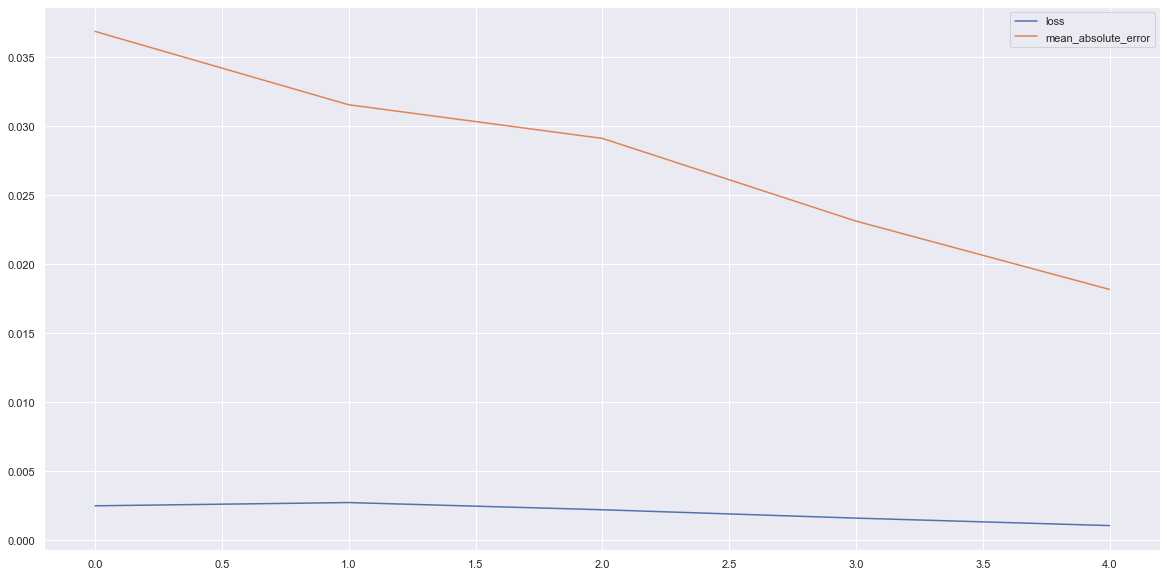

In [73]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mean_absolute_error'],label='mean_absolute_error')

plt.legend();
         

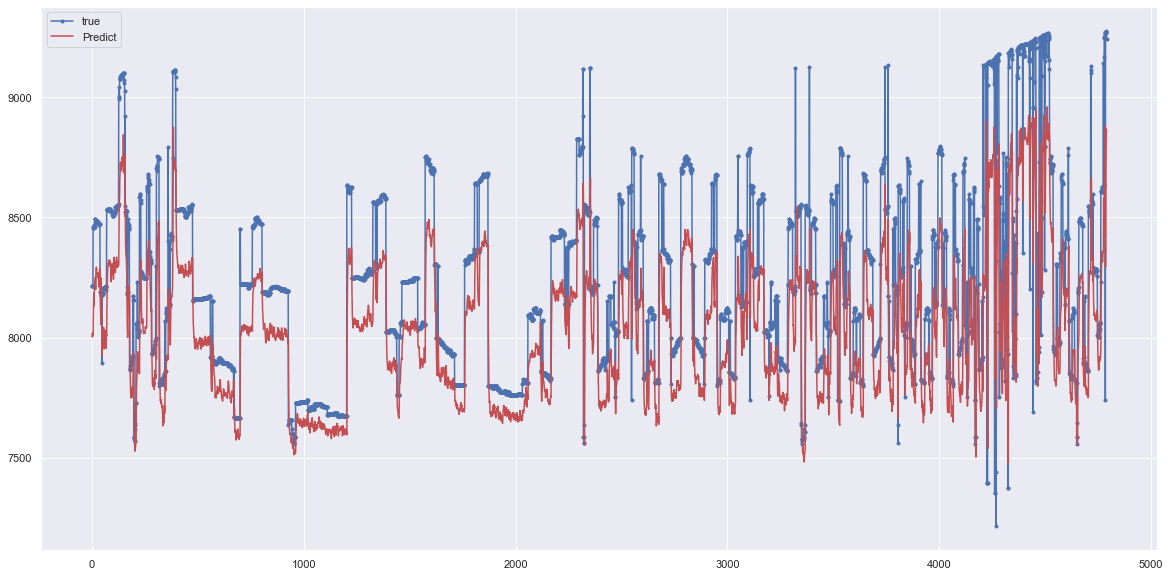

In [76]:
plt.plot(y_test_inv.flatten(),marker='.',label='true')
plt.plot(y_pred_inv.flatten(),'r',label='Predict')
plt.legend()

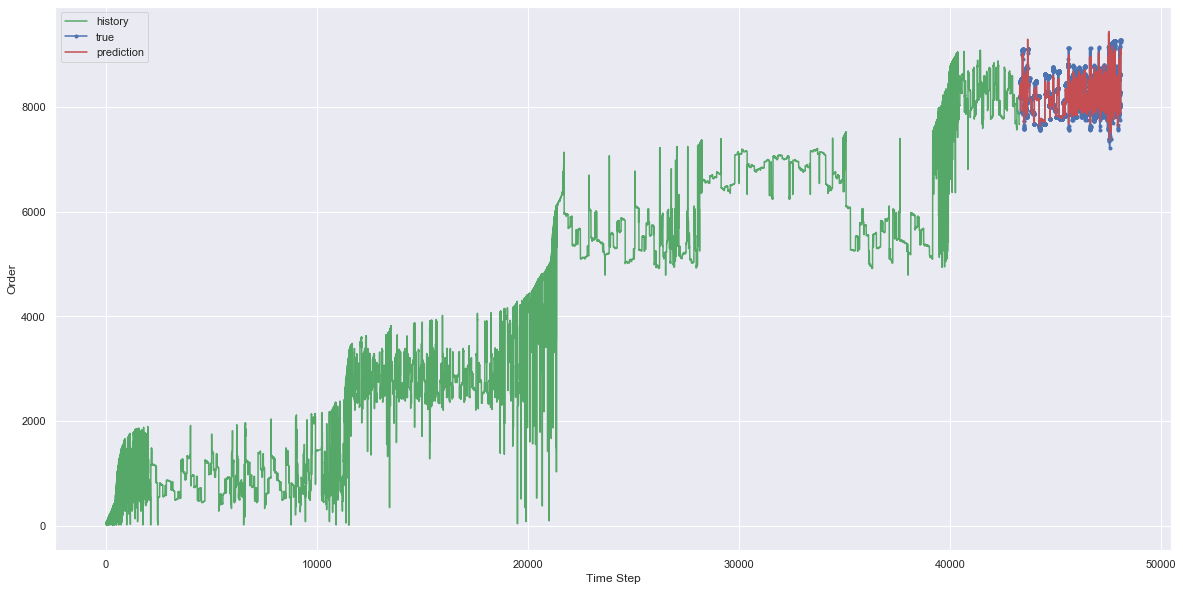

In [54]:

plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Order')
plt.xlabel('Time Step')
plt.legend()
plt.show();